# Transaction Conversion Analysis

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BillingOps-data.csv', sep=';')
df.head()

,created_day,channel_id,order_type,payment_source,merchant_token_type,is_secured,bin_amount_usd,status,error_code,error_message,bank_issuer,card_brand,card_type,card_country,ip_country,invoice_number,retry_number,count_orders,count_emails,Unnamed: 19
0,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,1.0,VISA,DEBIT,MDA,MDA,10.0,0,1,1,NaN
1,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,4838.0,VISA,DEBIT,KAZ,KAZ,28.0,0,1,1,NaN
2,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,7579.0,MASTERCARD,DEBIT,LTU,LTU,79.0,0,1,1,NaN
3,2023-04-01 00:00:00.000000,2,token,card,recurring,False,"[0,10)",fail,0.01,General decline,7450.0,VISA,CREDIT,PAK,PAK,61.0,1,1,1,NaN
4,2023-04-01 00:00:00.000000,2,token,card,recurring,False,"[0,10)",fail,3.02,Insufficient funds,1142.0,VISA,CREDIT,PAK,PAK,65.0,1,1,1,NaN


### value counts

In [3]:
print(df.shape)
columns = df.columns
for i in columns:
    print(i)
    print(df[i].isnull().sum())
    print(df[i].value_counts())

(685447, 20)
created_day
0
created_day
2023-09-06 00:00:00.000000    8536
2023-09-13 00:00:00.000000    7997
2023-08-30 00:00:00.000000    7891
2023-09-08 00:00:00.000000    7290
2023-09-03 00:00:00.000000    6698
                              ... 
2023-09-26 00:00:00.000000    1505
2023-09-28 00:00:00.000000    1473
2023-09-24 00:00:00.000000    1472
2023-09-23 00:00:00.000000    1443
2023-09-25 00:00:00.000000    1438
Name: count, Length: 184, dtype: int64
channel_id
0
channel_id
6    350449
5    230271
2     75736
3     26691
1      2300
Name: count, dtype: int64
order_type
1330
order_type
token    437503
first    246614
Name: count, dtype: int64
payment_source
0
payment_source
card          482054
apple-pay     124716
google-pay     78677
Name: count, dtype: int64
merchant_token_type
246614
merchant_token_type
recurring    389464
1-click       48039
another        1330
Name: count, dtype: int64
is_secured
0
is_secured
False    619714
True      65733
Name: count, dtype: int64
bin_am

### describe

In [4]:
print(df.info())
for i in columns:
    print(i)
    print(df[i].describe())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685447 entries, 0 to 685446
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   created_day          685447 non-null  object 
 1   channel_id           685447 non-null  int64  
 2   order_type           684117 non-null  object 
 3   payment_source       685447 non-null  object 
 4   merchant_token_type  438833 non-null  object 
 5   is_secured           685447 non-null  bool   
 6   bin_amount_usd       685447 non-null  object 
 7   status               685447 non-null  object 
 8   error_code           295951 non-null  float64
 9   error_message        295951 non-null  object 
 10  bank_issuer          677059 non-null  float64
 11  card_brand           681787 non-null  object 
 12  card_type            680993 non-null  object 
 13  card_country         681355 non-null  object 
 14  ip_country           685447 non-null  object 
 15  invoice_number   

## preprocessing

In [5]:
df_new = df.copy()
df_new.head()

,created_day,channel_id,order_type,payment_source,merchant_token_type,is_secured,bin_amount_usd,status,error_code,error_message,bank_issuer,card_brand,card_type,card_country,ip_country,invoice_number,retry_number,count_orders,count_emails,Unnamed: 19
0,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,1.0,VISA,DEBIT,MDA,MDA,10.0,0,1,1,NaN
1,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,4838.0,VISA,DEBIT,KAZ,KAZ,28.0,0,1,1,NaN
2,2023-04-01 00:00:00.000000,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,7579.0,MASTERCARD,DEBIT,LTU,LTU,79.0,0,1,1,NaN
3,2023-04-01 00:00:00.000000,2,token,card,recurring,False,"[0,10)",fail,0.01,General decline,7450.0,VISA,CREDIT,PAK,PAK,61.0,1,1,1,NaN
4,2023-04-01 00:00:00.000000,2,token,card,recurring,False,"[0,10)",fail,3.02,Insufficient funds,1142.0,VISA,CREDIT,PAK,PAK,65.0,1,1,1,NaN


### date

In [6]:
df_new['created_day_converted'] = pd.to_datetime(df['created_day'], errors='coerce')
out_of_range_dates = df_new[df_new['created_day_converted'].isna()]

є неіснуючі дати, типу 31 квітня, тому прибираємо це

In [7]:
def fix_invalid_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except ValueError:
        date_only = str(date_str).split(' ')[0]  # лишаємо тільки частину "YYYY-MM-DD"
        parts = date_only.split('-')
        year = int(parts[0])
        month = int(parts[1])
        day = int(parts[2])

        # правильні обмеження на дні в місяцях
        month_max_days = {
            4: 30, 5: 31, 6: 30,
            7: 31, 8: 31, 9: 30
        }

        if month in month_max_days and day > month_max_days[month]:
            day = 1
            month += 1
            if month > 12:
                month = 1
                year += 1
        return pd.Timestamp(year=year, month=month, day=day)

df_new['created_day_fixed'] = df_new['created_day'].apply(fix_invalid_date)
df_new['created_day_fixed'].head()

0   2023-04-01
1   2023-04-01
2   2023-04-01
3   2023-04-01
4   2023-04-01
Name: created_day_fixed, dtype: datetime64[ns]

In [8]:
df_new['created_day'] = pd.to_datetime(df_new['created_day_fixed']).dt.date
df_new = df_new.drop(['created_day_fixed', 'created_day_converted', 'Unnamed: 19'], axis=1)
df_new.head()

,created_day,channel_id,order_type,payment_source,merchant_token_type,is_secured,bin_amount_usd,status,error_code,error_message,bank_issuer,card_brand,card_type,card_country,ip_country,invoice_number,retry_number,count_orders,count_emails
0,2023-04-01,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,1.0,VISA,DEBIT,MDA,MDA,10.0,0,1,1
1,2023-04-01,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,4838.0,VISA,DEBIT,KAZ,KAZ,28.0,0,1,1
2,2023-04-01,1,token,card,recurring,False,"[0,10)",success,NaN,NaN,7579.0,MASTERCARD,DEBIT,LTU,LTU,79.0,0,1,1
3,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,0.01,General decline,7450.0,VISA,CREDIT,PAK,PAK,61.0,1,1,1
4,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,3.02,Insufficient funds,1142.0,VISA,CREDIT,PAK,PAK,65.0,1,1,1


створюю колонку з місяцем та днем тяжня, щоб перевірити гіпотезу щодо впливу місяцю та дня тижня на прохідність

In [9]:
df_new['created_day_dt'] = pd.to_datetime(df_new['created_day'])
df_new['month'] = df_new['created_day_dt'].dt.month
df_new['weekday'] = df_new['created_day_dt'].dt.dayofweek

### work with missing value

як саме обробляти пропущені дані дивлюся по ситуації. Якщо пропущених даних багато, то виділяю їх як окрему підгрупу, якщо пропущених даних не велика кількість, або приєдную їх до іншої підгрупи, або замінюю найчастішим, або видаляю

In [10]:
df_new['order_type'] = df_new['order_type'].replace({np.nan: 'Unknown'})
df_new['error_code'] = df_new['error_code'].replace({np.nan: 'Unknown'})
df_new['error_message'] = df_new['error_message'].replace({np.nan: 'Unknown'})

In [11]:
df_new['bank_issuer'] = df_new['bank_issuer'].replace({np.nan: df_new['bank_issuer'].mode().values})
df_new['card_brand'] = df_new['card_brand'].replace({np.nan: df_new['card_brand'].mode().values})
df_new['card_type'] = df_new['card_type'].replace({np.nan: df_new['card_type'].mode().values})
df_new['card_country'] = df_new['card_country'].replace({np.nan: df_new['card_country'].mode().values})

In [12]:
df_new['invoice_number_with_1'] = df_new['invoice_number'].replace({np.nan: -1})
df_new['retry_number'] = df_new['retry_number'].replace({'no_subscription': -1})
df_new['status'] = df_new['status'].replace({'created': 'success', 'verify': 'success'})

#### information about new data

In [13]:
columns = df_new.columns
for i in columns:
    print(i)
    print(df_new[i].isnull().sum())
    print(df_new[i].value_counts())

created_day
0
created_day
2023-09-06    8536
2023-09-13    7997
2023-08-30    7891
2023-09-08    7290
2023-09-03    6698
              ... 
2023-09-26    1505
2023-09-28    1473
2023-09-24    1472
2023-09-23    1443
2023-09-25    1438
Name: count, Length: 182, dtype: int64
channel_id
0
channel_id
6    350449
5    230271
2     75736
3     26691
1      2300
Name: count, dtype: int64
order_type
0
order_type
token      437503
first      246614
Unknown      1330
Name: count, dtype: int64
payment_source
0
payment_source
card          482054
apple-pay     124716
google-pay     78677
Name: count, dtype: int64
merchant_token_type
246614
merchant_token_type
recurring    389464
1-click       48039
another        1330
Name: count, dtype: int64
is_secured
0
is_secured
False    619714
True      65733
Name: count, dtype: int64
bin_amount_usd
0
bin_amount_usd
[20,40)      302590
[0,10)       155149
[10,20)      139310
[40,60)       80389
[60,100)       7783
[100,150)       226
Name: count, dtype: int6

### convert data

In [14]:
df_new['bank_issuer'] = df_new['bank_issuer'].astype(int)
df_new['invoice_number_with_1'] = df_new['invoice_number_with_1'].astype(int)

## Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le_ot = LabelEncoder()
le_ps = LabelEncoder()
le_mtt = LabelEncoder()
le_s = LabelEncoder()
le_m = LabelEncoder()
le_w = LabelEncoder()
le_bau = LabelEncoder()
le_cb = LabelEncoder()
le_ct = LabelEncoder()

In [16]:
le_ot.fit(df_new['order_type'])
le_ps.fit(df_new['payment_source'])
le_mtt.fit(df_new['merchant_token_type'])
le_s.fit(df_new['status'])
le_m.fit(df_new['month'])
le_w.fit(df_new['weekday'])
le_cb.fit(df_new['card_brand'])
le_ct.fit(df_new['card_type'])
le_bau.fit(df_new['bin_amount_usd'])

LabelEncoder()

In [17]:
df_new['order_type_label'] = le_ot.transform(df_new['order_type'])
df_new['payment_source_label'] = le_ps.transform(df_new['payment_source'])
df_new['merchant_token_type_label'] = le_mtt.transform(df_new['merchant_token_type'])
df_new['status_label'] = le_s.transform(df_new['status'])
df_new['month_label'] = le_m.fit_transform(df_new['month'])
df_new['weekday_label'] = le_w.fit_transform(df_new['weekday'])
df_new['bin_amount_usd_label'] = le_bau.transform(df_new['bin_amount_usd'])
df_new['card_brand_label'] = le_cb.transform(df_new['card_brand'])
df_new['card_type_label'] = le_ct.transform(df_new['card_type'])

In [18]:
freq_encoding_bin = df_new['bin_amount_usd'].value_counts(normalize=True)
freq_encoding_ec = df_new['error_code'].value_counts(normalize=True)
freq_encoding_em = df_new['error_message'].value_counts(normalize=True)
freq_encoding_cb = df_new['card_brand'].value_counts(normalize=True)
freq_encoding_ct = df_new['card_type'].value_counts(normalize=True)
freq_encoding_cc = df_new['card_country'].value_counts(normalize=True)
freq_encoding_ic = df_new['ip_country'].value_counts(normalize=True)
freq_encoding_in = df_new['invoice_number_with_1'].value_counts(normalize=True)
freq_encoding_rn = df_new['retry_number'].value_counts(normalize=True)
freq_encoding_bi = df_new['bank_issuer'].value_counts(normalize=True)

In [19]:
df_new['bin_amount_usd_freq'] = df_new['bin_amount_usd'].map(freq_encoding_bin)
df_new['error_code_freq'] = df_new['error_code'].map(freq_encoding_ec)
df_new['error_message_freq'] = df_new['error_message'].map(freq_encoding_em)
df_new['card_brand_freq'] = df_new['card_brand'].map(freq_encoding_cb)
df_new['card_type_freq'] = df_new['card_type'].map(freq_encoding_ct)
df_new['card_country_freq'] = df_new['card_country'].map(freq_encoding_cc)
df_new['ip_country_freq'] = df_new['ip_country'].map(freq_encoding_ic)
df_new['invoice_number_with1_freq'] = df_new['invoice_number_with_1'].map(freq_encoding_in)
df_new['retry_number_freq'] = df_new['retry_number'].map(freq_encoding_rn)
df_new['bank_issuer_freq'] = df_new['bank_issuer'].map(freq_encoding_bi)

### drop data

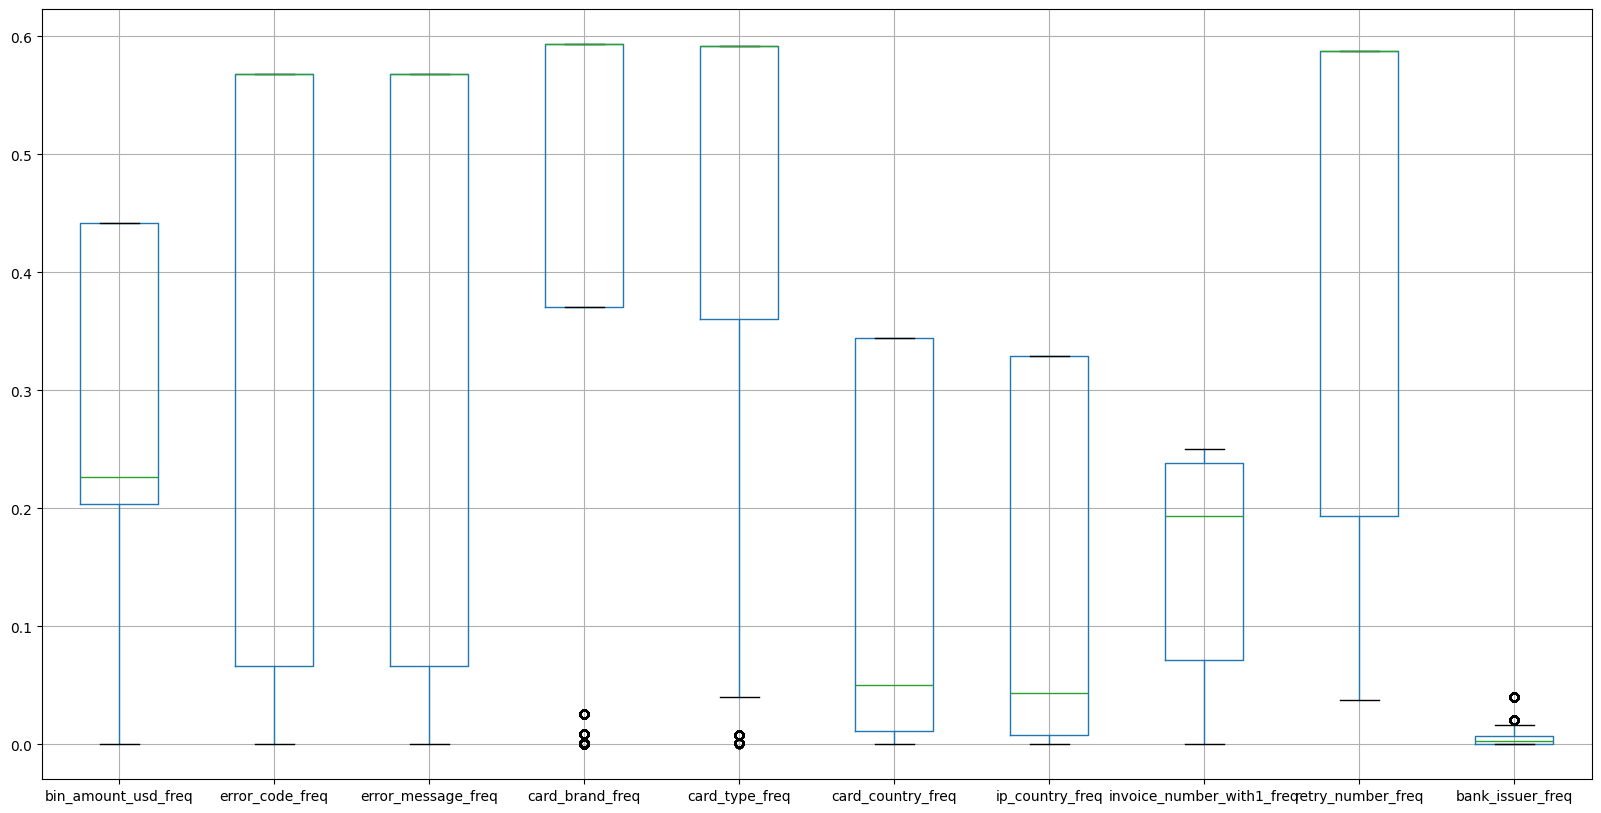

In [20]:
out_data = df_new[['bin_amount_usd_freq', 'error_code_freq', 'error_message_freq', 'card_brand_freq', 'card_type_freq', 'card_country_freq','ip_country_freq', 'invoice_number_with1_freq', 'retry_number_freq', 'bank_issuer_freq']]
plt.figure(figsize=(20, 10))
out_data.boxplot()
plt.show()

In [21]:
Q1 = out_data.quantile(0.25)
Q3 = out_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

# Видаляємо рядки, де в будь-якій колонці значення <= порогу
condition = ~((out_data <= lower_bound).any(axis=1))
df_filtered = df_new[condition].reset_index(drop=True)
df_filtered = df_filtered[df_filtered['order_type'] != 'Unknown']
print(df_filtered.shape)
df_filtered.head()

(654191, 42)


,created_day,channel_id,order_type,payment_source,merchant_token_type,is_secured,bin_amount_usd,status,error_code,error_message,...,bin_amount_usd_freq,error_code_freq,error_message_freq,card_brand_freq,card_type_freq,card_country_freq,ip_country_freq,invoice_number_with1_freq,retry_number_freq,bank_issuer_freq
0,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.226347,0.568236,0.568236,0.593426,0.591637,0.000465,0.000566,0.004415,0.587638,0.000010
1,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.226347,0.568236,0.568236,0.593426,0.591637,0.003455,0.003084,0.001037,0.587638,0.001083
2,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.226347,0.568236,0.568236,0.370364,0.591637,0.003736,0.002725,0.002061,0.587638,0.002997
3,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,0.01,General decline,...,0.226347,0.019090,0.019090,0.593426,0.360110,0.000713,0.000797,0.002702,0.077030,0.000066
4,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,3.02,Insufficient funds,...,0.226347,0.153812,0.153812,0.593426,0.360110,0.000713,0.000797,0.002807,0.077030,0.000098


## Feature Engineering

In [22]:
df_filtered['is_same_country'] = df_filtered['card_country'] == df_filtered['ip_country']
df_filtered[['is_same_country', 'card_country', 'ip_country']].head()

,is_same_country,card_country,ip_country
0,True,MDA,MDA
1,True,KAZ,KAZ
2,True,LTU,LTU
3,True,PAK,PAK
4,True,PAK,PAK


рахую прохідність і щоб вона рахувалася максимально коректно для кожної покупки(а не спробі покупки, бо якщо я не згрупую дані, то так і буде) групую по channel_id та invoice_number_with_1, бо channel_id показує продукт, а invoice_number_with_1 - номер оплати підписника. Це не ідеальний варіант, але він найбільш точно розбиває наші дані на потенційну покупку від одного користувача

In [23]:
grouped = df_filtered.groupby(['channel_id', 'invoice_number_with_1'])
agg_df = grouped.agg(
    successful_orders=('status_label', 'sum'),   # Сума успішних транзакцій (бо 1 = успіх)
    total_orders=('status_label', 'count')        # Просто кількість всіх транзакцій
).reset_index()
agg_df['conversion'] = agg_df['successful_orders'] / agg_df['total_orders']

df_with_conversion = df_filtered.merge(
    agg_df[['channel_id', 'invoice_number_with_1', 'conversion']],
    on=['channel_id', 'invoice_number_with_1',],
    how='left'  # зберігаємо всі транзакції
)

df_with_conversion.head()

,created_day,channel_id,order_type,payment_source,merchant_token_type,is_secured,bin_amount_usd,status,error_code,error_message,...,error_message_freq,card_brand_freq,card_type_freq,card_country_freq,ip_country_freq,invoice_number_with1_freq,retry_number_freq,bank_issuer_freq,is_same_country,conversion
0,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.568236,0.593426,0.591637,0.000465,0.000566,0.004415,0.587638,0.000010,True,0.166667
1,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.568236,0.593426,0.591637,0.003455,0.003084,0.001037,0.587638,0.001083,True,0.857143
2,2023-04-01,1,token,card,recurring,False,"[0,10)",success,Unknown,Unknown,...,0.568236,0.370364,0.591637,0.003736,0.002725,0.002061,0.587638,0.002997,True,0.705882
3,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,0.01,General decline,...,0.019090,0.593426,0.360110,0.000713,0.000797,0.002702,0.077030,0.000066,True,0.817782
4,2023-04-01,2,token,card,recurring,False,"[0,10)",fail,3.02,Insufficient funds,...,0.153812,0.593426,0.360110,0.000713,0.000797,0.002807,0.077030,0.000098,True,0.810730


In [24]:
df_to_export = df_with_conversion[['created_day', 'month', 'weekday','channel_id', 'order_type', 'order_type_label', 'payment_source', 'payment_source_label', 'merchant_token_type', 'merchant_token_type_label', 'is_secured', 'bin_amount_usd','bin_amount_usd_label', 'status', 'status_label',
       'error_code', 'error_message','bank_issuer', 'card_brand','card_brand_label','card_type', 'card_type_label','card_country',
       'card_country_freq', 'ip_country','ip_country_freq', 'is_same_country', 'invoice_number_with_1','retry_number',
       'count_orders', 'count_emails','conversion']]
df_to_export.to_csv('clean_data.csv', index=True)

## Correlation

In [25]:
df_with_conversion.columns

Index(['created_day', 'channel_id', 'order_type', 'payment_source',
       'merchant_token_type', 'is_secured', 'bin_amount_usd', 'status',
       'error_code', 'error_message', 'bank_issuer', 'card_brand', 'card_type',
       'card_country', 'ip_country', 'invoice_number', 'retry_number',
       'count_orders', 'count_emails', 'created_day_dt', 'month', 'weekday',
       'invoice_number_with_1', 'order_type_label', 'payment_source_label',
       'merchant_token_type_label', 'status_label', 'month_label',
       'weekday_label', 'bin_amount_usd_label', 'card_brand_label',
       'card_type_label', 'bin_amount_usd_freq', 'error_code_freq',
       'error_message_freq', 'card_brand_freq', 'card_type_freq',
       'card_country_freq', 'ip_country_freq', 'invoice_number_with1_freq',
       'retry_number_freq', 'bank_issuer_freq', 'is_same_country',
       'conversion'],
      dtype='object')

In [26]:
df_numb = df_with_conversion[['month_label',
       'weekday_label', 'channel_id', 'invoice_number_with_1',
       'order_type_label', 'payment_source_label', 'merchant_token_type_label', 'bin_amount_usd_label',
       'error_code_freq', 'error_message_freq', 'card_brand_label',
       'card_type_label', 'card_country_freq', 'ip_country_freq', 'is_same_country',
        'retry_number', 'bank_issuer','count_orders', 'count_emails',
       'conversion']]
corr_matrix = df_numb.corr()

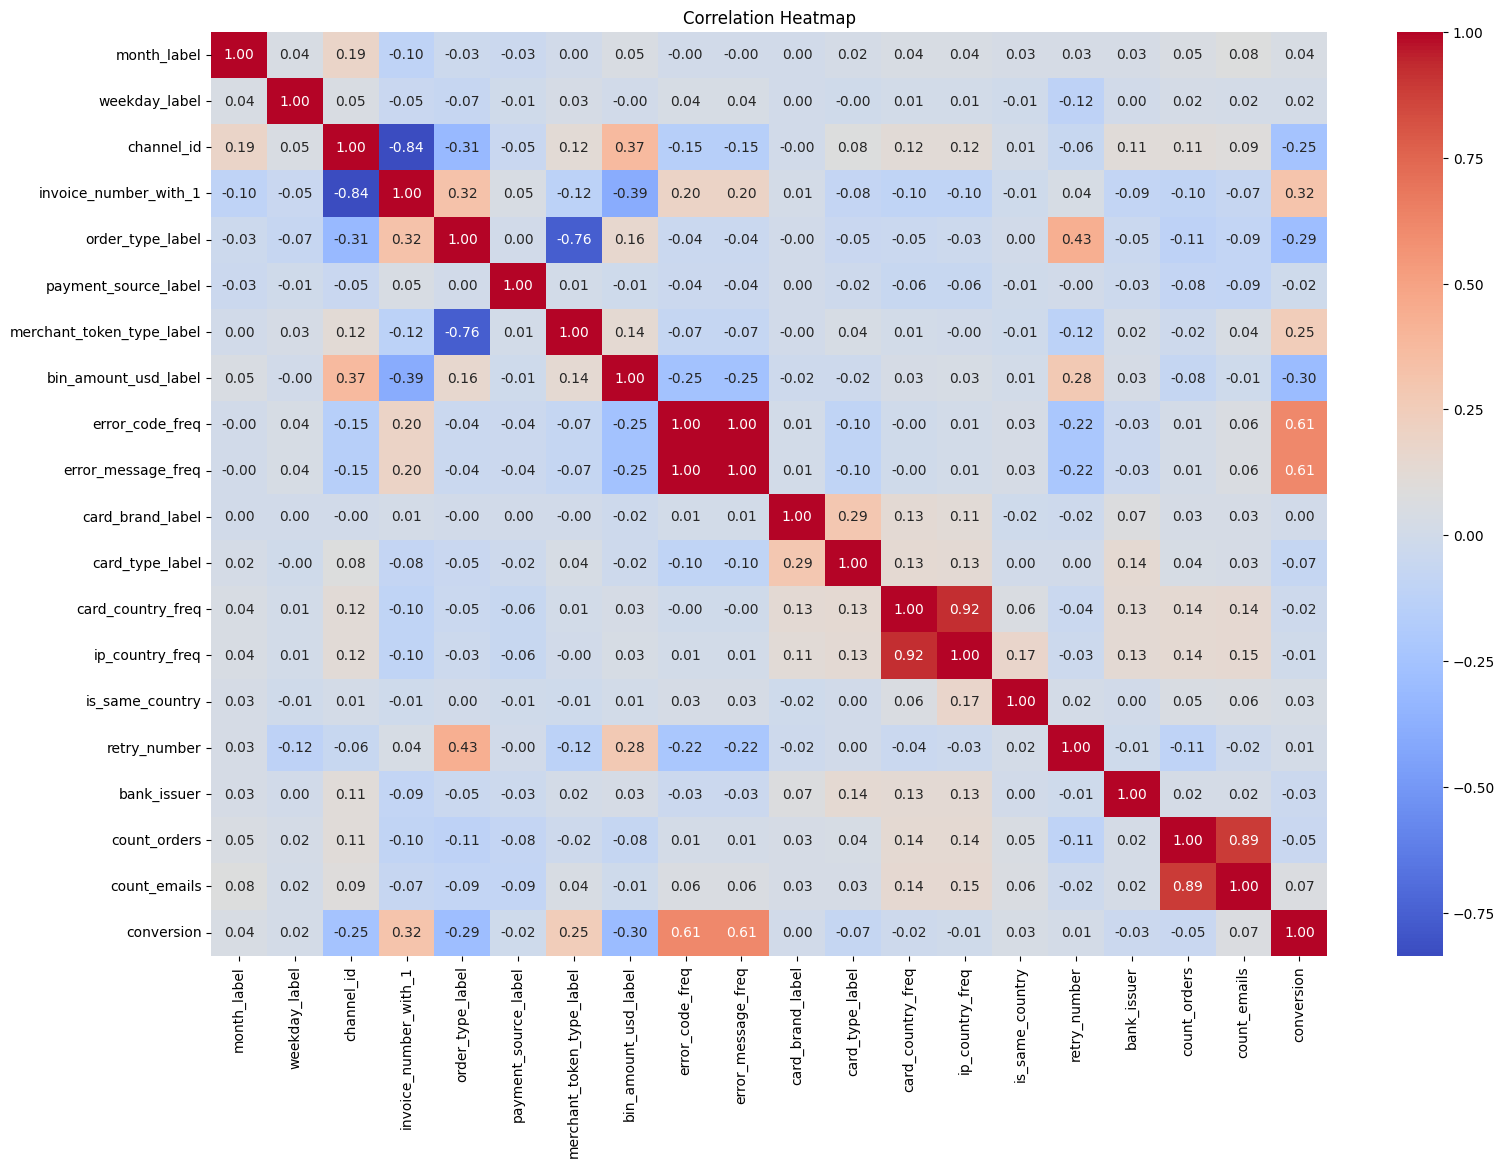

In [27]:
import seaborn as sns
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
corr_matrix

,month_label,weekday_label,channel_id,invoice_number_with_1,order_type_label,payment_source_label,merchant_token_type_label,bin_amount_usd_label,error_code_freq,error_message_freq,card_brand_label,card_type_label,card_country_freq,ip_country_freq,is_same_country,retry_number,bank_issuer,count_orders,count_emails,conversion
month_label,1.000000,0.041270,0.189554,-0.104176,-0.028045,-0.032781,0.000341,0.053394,-0.000298,-0.000298,0.001701,0.024173,0.041213,0.041288,0.028189,0.027119,0.030715,0.052619,0.080186,0.040265
weekday_label,0.041270,1.000000,0.047666,-0.048445,-0.066270,-0.006274,0.027271,-0.003490,0.035074,0.035074,0.001693,-0.004828,0.006578,0.006197,-0.006127,-0.117548,0.001251,0.018791,0.015091,0.015947
channel_id,0.189554,0.047666,1.000000,-0.835155,-0.313915,-0.049100,0.118674,0.371891,-0.149808,-0.149808,-0.001670,0.081148,0.115878,0.115710,0.014550,-0.055327,0.105868,0.110699,0.090011,-0.247557
invoice_number_with_1,-0.104176,-0.048445,-0.835155,1.000000,0.322007,0.045262,-0.120829,-0.392636,0.195800,0.195800,0.013053,-0.075520,-0.102425,-0.103128,-0.011177,0.037278,-0.087316,-0.095998,-0.067858,0.318723
order_type_label,-0.028045,-0.066270,-0.313915,0.322007,1.000000,0.002328,-0.760968,0.160936,-0.043497,-0.043497,-0.001336,-0.052363,-0.045476,-0.030989,0.000375,0.434737,-0.046044,-0.111670,-0.089394,-0.286289
payment_source_label,-0.032781,-0.006274,-0.049100,0.045262,0.002328,1.000000,0.005298,-0.013600,-0.038659,-0.038659,0.001253,-0.018000,-0.058638,-0.058935,-0.006871,-0.000247,-0.031602,-0.080307,-0.085347,-0.016128
merchant_token_type_label,0.000341,0.027271,0.118674,-0.120829,-0.760968,0.005298,1.000000,0.136759,-0.069682,-0.069682,-0.000213,0.037412,0.008820,-0.002006,-0.010982,-0.121341,0.017419,-0.022134,0.043971,0.249342
bin_amount_usd_label,0.053394,-0.003490,0.371891,-0.392636,0.160936,-0.013600,0.136759,1.000000,-0.254948,-0.254948,-0.018827,-0.020326,0.025379,0.034937,0.006062,0.280309,0.031553,-0.075159,-0.014250,-0.300490
error_code_freq,-0.000298,0.035074,-0.149808,0.195800,-0.043497,-0.038659,-0.069682,-0.254948,1.000000,1.000000,0.005503,-0.099614,-0.003659,0.008382,0.029036,-0.223495,-0.032610,0.011691,0.058099,0.614596
error_message_freq,-0.000298,0.035074,-0.149808,0.195800,-0.043497,-0.038659,-0.069682,-0.254948,1.000000,1.000000,0.005503,-0.099614,-0.003659,0.008382,0.029036,-0.223495,-0.032610,0.011691,0.058099,0.614596
